In [1]:
import matplotlib.pyplot as plt
import glob
import pickle
from collections import defaultdict
import pandas as pd
import seaborn as sns
from utils import *

/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)


In [2]:
pdf = get_problem_algorithm_performance('prediction_errors/mape.csv')
forecasting_algorithms = list(pdf.columns)

get_problem_algorithm_performance took=0:00:02.366872 shape=(100000, 61)


In [3]:
data = defaultdict(lambda: [])

files = glob.glob('trained_model/feature_compare/*/meta.p')
for file in files:
    meta = pickle.load(open(file, "rb"))
    algo = re_find('m_(.+?)_f_', file)
    features = re_find('f_(.+?)_r_', file)
    run = re_find('_r_(.+?)_c_', file)
    cor = re_find('c_(.+?)/', file)
    
    for i, fa_error in enumerate(meta['error_column_mse']):
        data['ForecastingAlgorithmError'].append(fa_error)
        data['ForecastingAlgorithm'].append(forecasting_algorithms[i])
        
        
        data['Model'].append(algo)
        data['Features'].append(features)

        data['Run'].append(run)
        data['FeatureCorrelation'].append(cor)
        
df = pd.DataFrame(dict(data))
df

,ForecastingAlgorithmError,ForecastingAlgorithm,Model,Features,Run,FeatureCorrelation
0,0.013781,250,M4KerasNetRegressionModel,"Catch22,Catch22Diff,Catch22Log",10,0.95
1,0.012525,118,M4KerasNetRegressionModel,"Catch22,Catch22Diff,Catch22Log",10,0.95
2,0.013456,238,M4KerasNetRegressionModel,"Catch22,Catch22Diff,Catch22Log",10,0.95
3,0.013718,039,M4KerasNetRegressionModel,"Catch22,Catch22Diff,Catch22Log",10,0.95
4,0.013331,072,M4KerasNetRegressionModel,"Catch22,Catch22Diff,Catch22Log",10,0.95
...,...,...,...,...,...,...
180433,0.013877,234,M4KerasNetRegressionModel,"TSFresh,TSFreshDiff,TSFreshLog",4,0.8
180434,0.010023,SES,M4KerasNetRegressionModel,"TSFresh,TSFreshDiff,TSFreshLog",4,0.8
180435,0.011472,255,M4KerasNetRegressionModel,"TSFresh,TSFreshDiff,TSFreshLog",4,0.8
180436,0.013107,082,M4KerasNetRegressionModel,"TSFresh,TSFreshDiff,TSFreshLog",4,0.8


In [4]:
figures_directory = 'figures'

In [5]:
model = 'M4RandomForestRegressor'
sdf = df.query(f"Model == '{model}' and Features == 'TSFresh' and FeatureCorrelation == '0.5'")

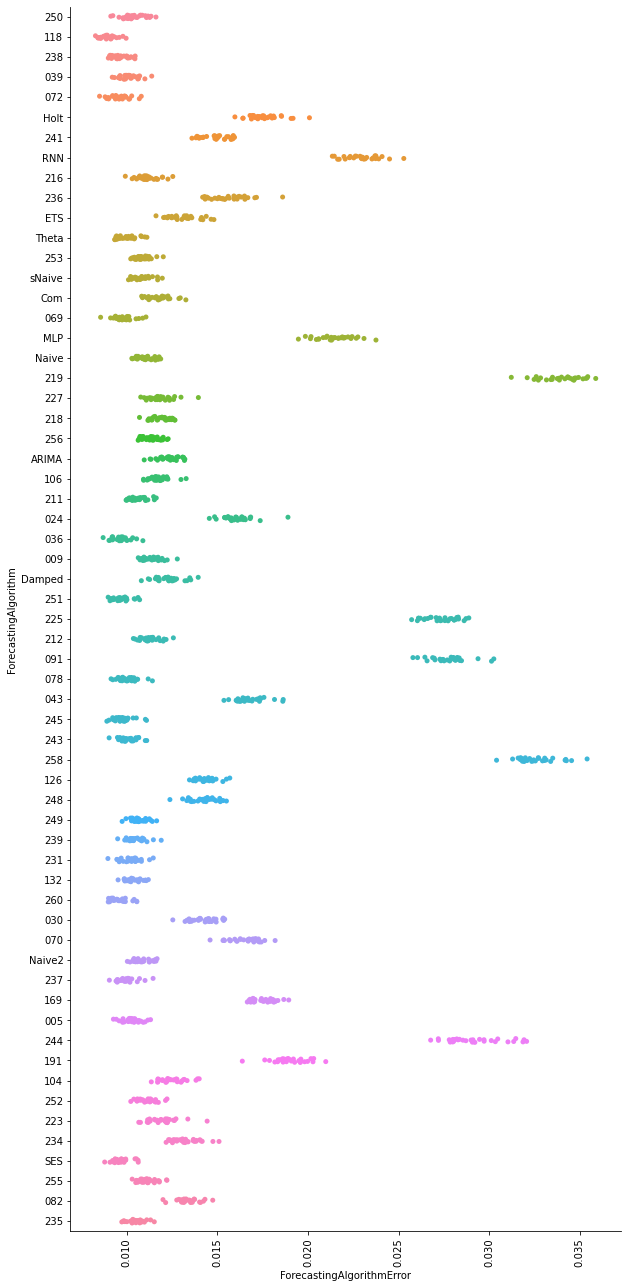

In [6]:
g = sns.catplot(x = "ForecastingAlgorithmError",
                y = "ForecastingAlgorithm",
                data = sdf)#,
                #kind = "bar")
g.fig.set_size_inches(10, 20)
plt.xticks(rotation=90)
plt.savefig(f'{figures_directory}/{model}_0.5_error_all_fa.pdf', bbox_inches='tight', pad_inches=0)

/opt/conda/envs/Base/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/envs/Base/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/envs/Base/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/envs/Base/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/envs/Base/lib/pyt

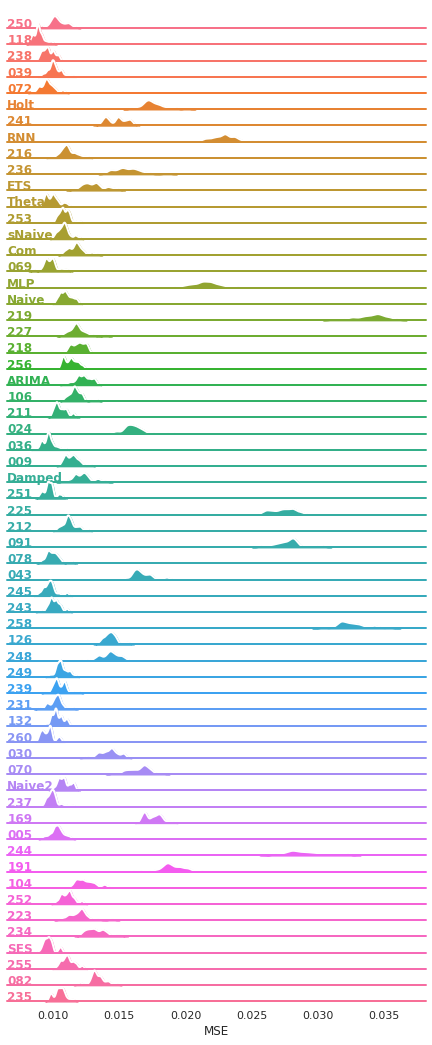

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(sdf, row="ForecastingAlgorithm", hue="ForecastingAlgorithm", aspect=25, height=.3)#, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "ForecastingAlgorithmError",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "ForecastingAlgorithmError", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "ForecastingAlgorithmError")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xlabel('MSE')
plt.savefig(f'{figures_directory}/{model}_0.5_error_all_fa.pdf', bbox_inches='tight', pad_inches=0)

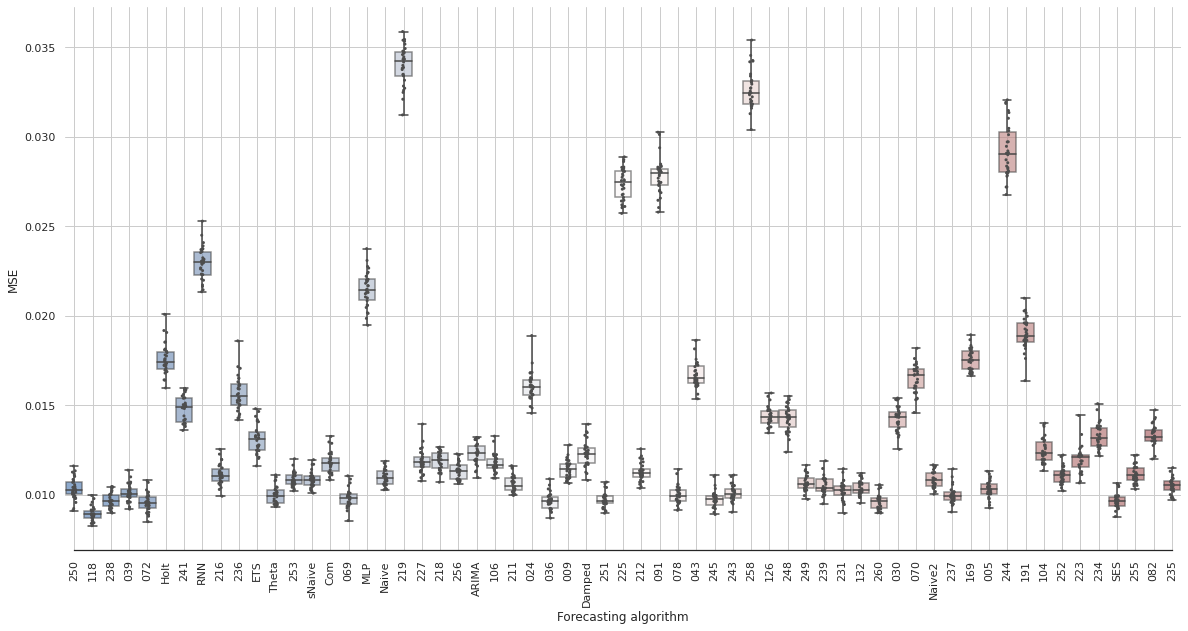

In [8]:
sns.set_theme(style="white")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(20, 10))
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(y="ForecastingAlgorithmError", x="ForecastingAlgorithm", data=sdf, width=.9, palette="vlag", boxprops=dict(alpha=.6), whis=[0, 100])

# Add in points to show each observation
sns.stripplot(y="ForecastingAlgorithmError", x="ForecastingAlgorithm", data=sdf, size=3, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set(ylabel="MSE")
ax.set(xlabel="Forecasting algorithm")
plt.xticks(rotation = 90)
sns.despine(trim=True, left=True)
#plt.savefig(f'{figures_directory}/{model}_0.5_error_all_fa.pdf', bbox_inches='tight', pad_inches=0)